In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [56]:

# Carregar o arquivo CSV
df = pd.read_csv('energy_demand_hourly_brazil.csv')

# Visualizar as primeiras linhas para confirmar o carregamento
print(df.head())


                 index  hourly_demand
0  2000-01-01 00:00:00        34673.9
1  2000-01-01 01:00:00        33503.0
2  2000-01-01 02:00:00        32287.6
3  2000-01-01 03:00:00        31059.4
4  2000-01-01 04:00:00        30272.7


In [57]:
# Converter a coluna "Data" para datetime e definir como índice
df['index'] = pd.to_datetime(df['index'], errors='coerce')  # Tratar valores inválidos
df = df.dropna(subset=['index'])  # Remover valores inválidos
df.set_index('index', inplace=True)

# Visualizar o dataframe após a transformação
print(df.head())

                     hourly_demand
index                             
2000-01-01 00:00:00        34673.9
2000-01-01 01:00:00        33503.0
2000-01-01 02:00:00        32287.6
2000-01-01 03:00:00        31059.4
2000-01-01 04:00:00        30272.7


In [58]:
# Selecionar a quantidade de Dados
n_dados = 4417
df_cortado = df.tail(n_dados)

# Verificar a quantidade de dados após o corte
print(f"Número de dados selecionados: {len(df_cortado)}")
print(df_cortado.head())

Número de dados selecionados: 4417
                     hourly_demand
index                             
2022-07-01 00:00:00   61799.484017
2022-07-01 01:00:00   58970.505005
2022-07-01 02:00:00   57077.577992
2022-07-01 03:00:00   56447.815943
2022-07-01 04:00:00   56746.314011


In [59]:
# Exportar o dataframe cortado para um novo arquivo CSV
output_csv = 'dataframe.csv'  # Nome do arquivo de saída
df_cortado.to_csv(output_csv)

print(f"Arquivo exportado com sucesso: {output_csv}")

Arquivo exportado com sucesso: dataframe.csv


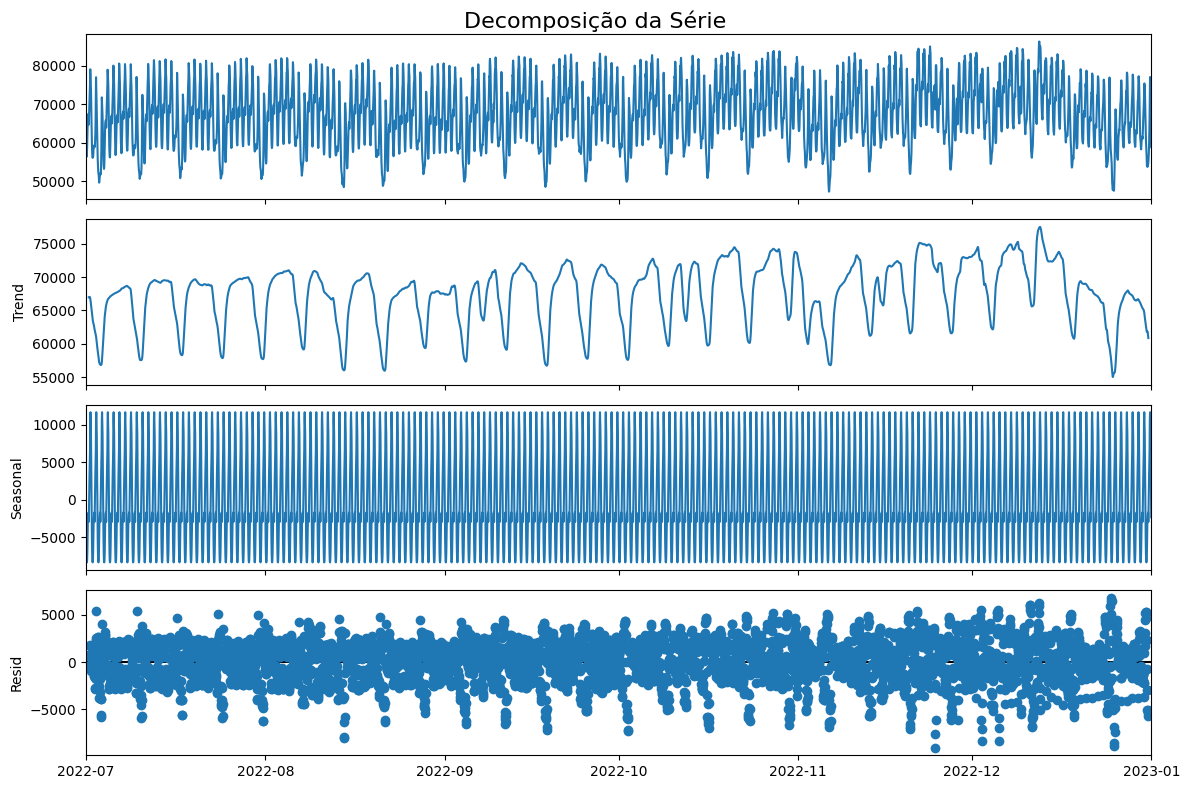

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposição
decomposition = seasonal_decompose(df_cortado, model='additive', period=24) 
# Visualização
fig = decomposition.plot()
fig.set_size_inches(12, 8)
fig.suptitle('Decomposição da Série', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

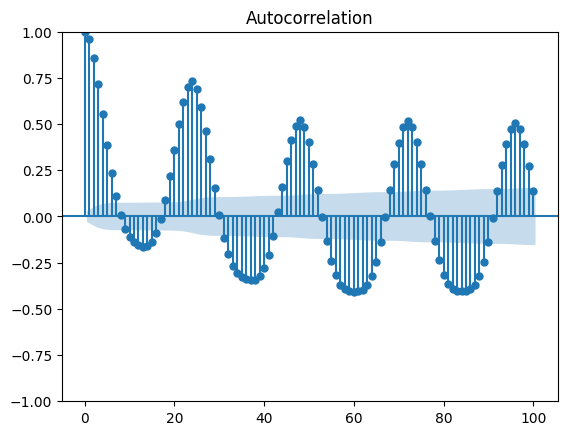

In [61]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_cortado, lags=100)  # Ajuste 'lags' para verificar mais atrasos
plt.show()


<Axes: title={'center': 'Série sem Tendência (Primeira Ordem)'}, xlabel='index'>

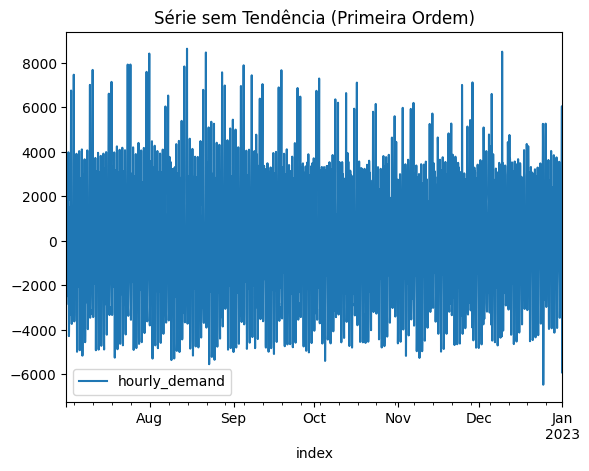

In [62]:
# Diferenciação de primeira ordem
detrended = df_cortado.diff()

# Removendo valores nulos gerados pela diferença
detrended = detrended.dropna()

# Plotando
detrended.plot(title="Série sem Tendência (Primeira Ordem)")


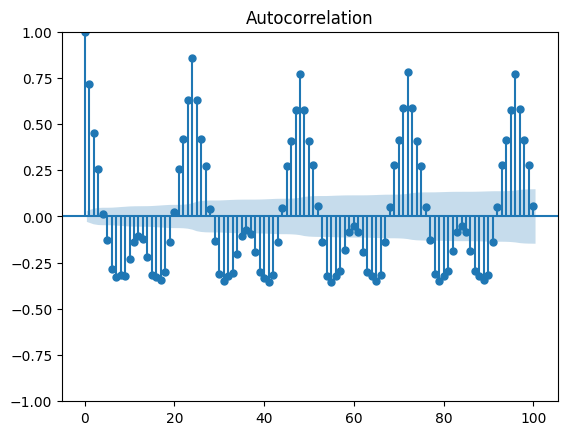

In [63]:
plot_acf(detrended, lags=100)  # Ajuste 'lags' para verificar mais atrasos
plt.show()

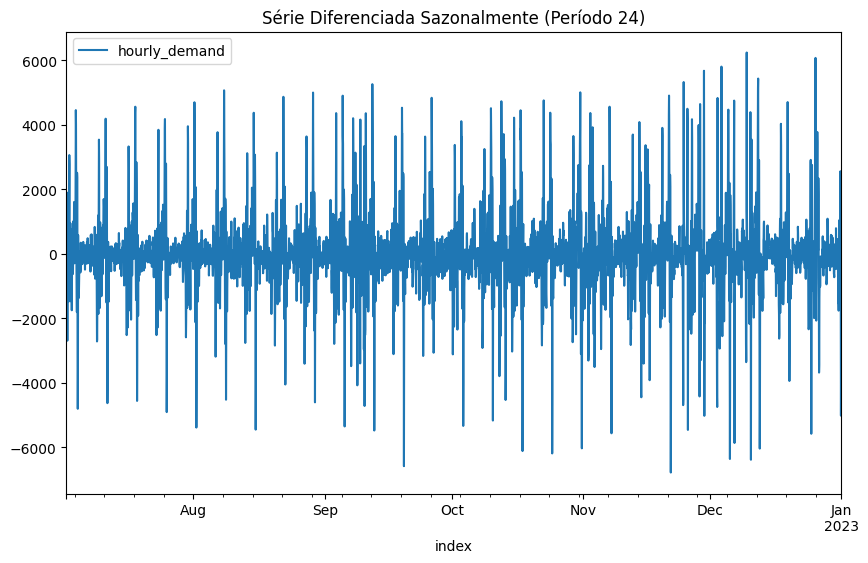

In [64]:
# Diferenciação sazonal com período 24
seasonal_diff = detrended.diff(periods=24)

# Removendo valores nulos gerados pela diferença
seasonal_diff = seasonal_diff.dropna()

# Plotando a série diferenciada
seasonal_diff.plot(title="Série Diferenciada Sazonalmente (Período 24)", figsize=(10, 6))
plt.show()


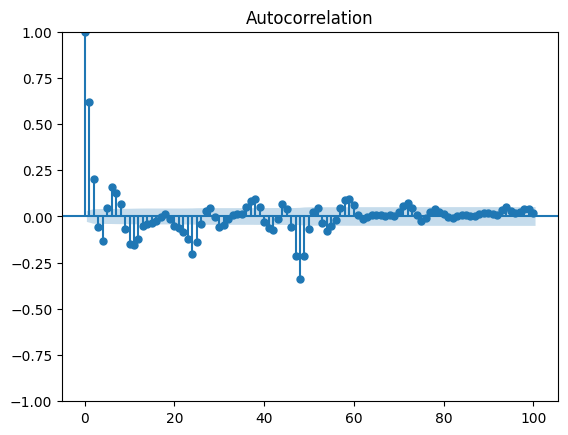

In [65]:
plot_acf(seasonal_diff, lags=100)  # Ajuste 'lags' para verificar mais atrasos
plt.show()

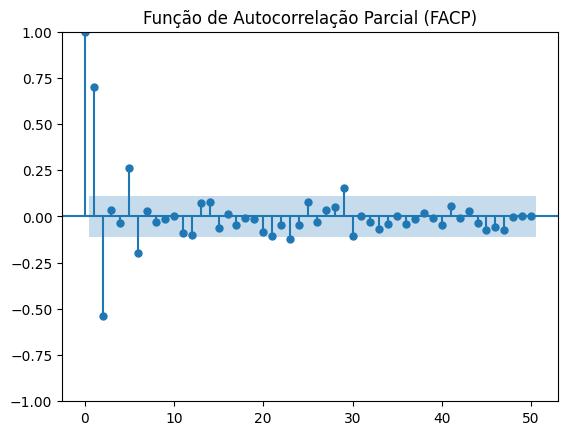

In [48]:
# FACP (Função de Autocorrelação Parcial)
plot_pacf(seasonal_diff, lags=50, method='ywm')
plt.title("Função de Autocorrelação Parcial (FACP)")
plt.show()